A big portion of the work needed to analyze technologies in films and in the movie industry lies in the analysis of the move plot summaries. 
Technically, this analysis is done by extracting the useful words in the plots. 
Hence, in this section we:
1) Seperate the movie IDs from the plots as dictionaries
2) Use the NTLK library to tokenize the movie plots
3) Define a list of words to use for the search
4) Count the number of movies that contain at least 1 word in the given list per year
5) Plot the result in a graph

In [ ]:
# Imports and downloads
import nltk # Natural language processing library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')
import os
import gzip
import tarfile
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
# Note that these libraries are not in anaconda by default, meaning you will have to download them before using them-

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Counter({'computer': 1055, 'technology': 390, 'internet': 299, 'robots': 285, 'software': 122, 'electronics': 80, 'digital': 79, 'tech': 61})


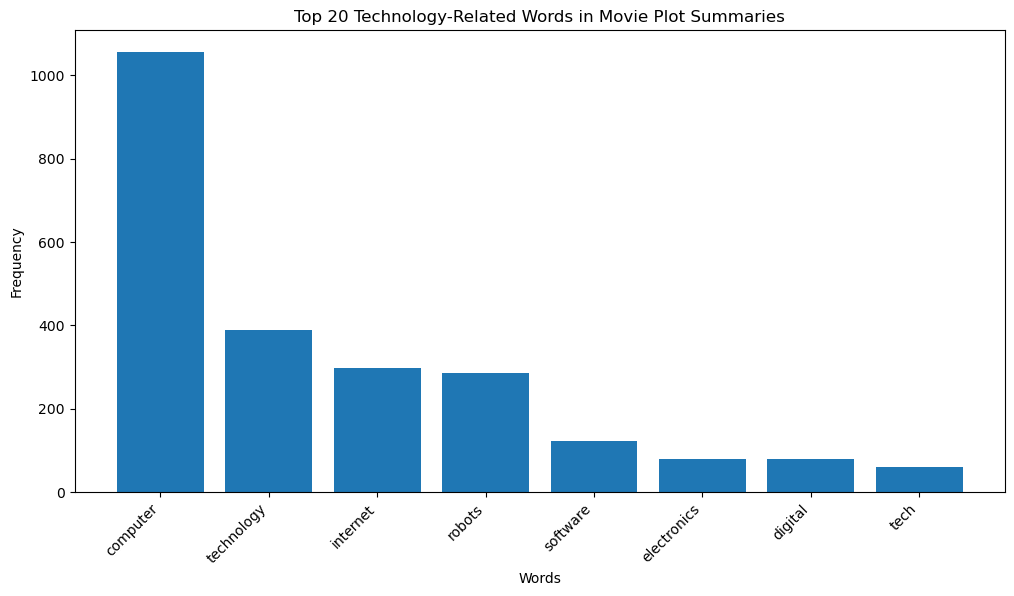

In [13]:
pathv = "../data/"
# Read the plot summaries from the text file
with open(pathv + 'plot_summaries.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
# Extract movie IDs and plot summaries and put them in lists.
movie_ids = []
plot_summaries = []

for line in lines:
    parts = line.split('\t')
    if len(parts) == 2:
        movie_id, summary = parts
        movie_ids.append(movie_id)
        plot_summaries.append(summary)

stop_words = set(stopwords.words('english'))

# Define a list of technology-related keywords 
technology_keywords = ["technology", "robots", "tech", "computer", "internet", "software", "digital", "electronics"]

# Tokenize and preprocess the plot summaries
tokenized_summaries = []
for summary in plot_summaries:
    tokens = word_tokenize(summary)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokenized_summaries.extend(tokens)

# Count the occurrence of technology-related keywords
technology_word_counts = Counter(word for word in tokenized_summaries if word in technology_keywords)
print(technology_word_counts)

# Get the 20 most common technology-related words
top_technology_words = technology_word_counts.most_common(20)

# Plot the occurrence of the top technology-related words
words, counts = zip(*top_technology_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Top 20 Technology-Related Words in Movie Plot Summaries')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


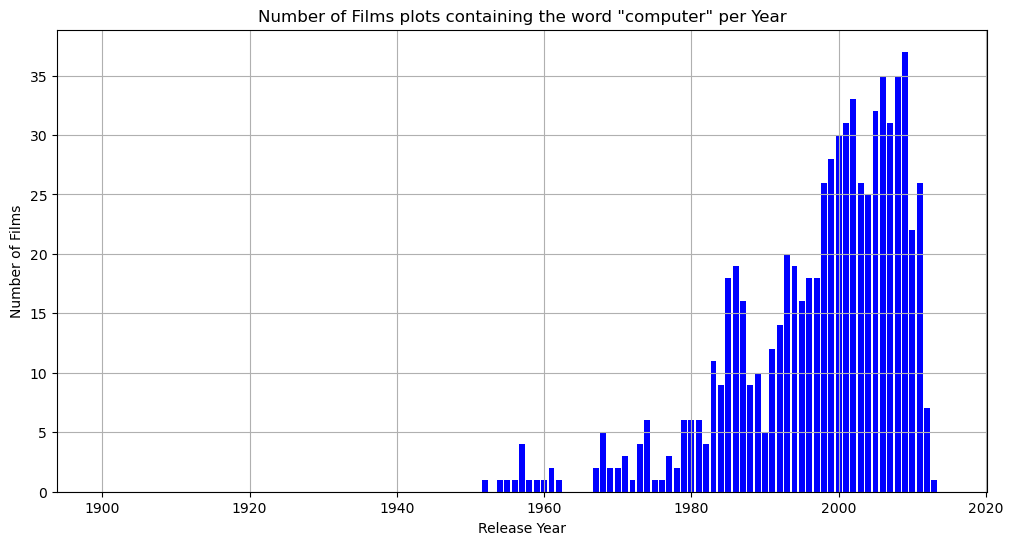

In [15]:
# Read the movie dataframe
from helpers import date_to_float

names = ['wikipedia_movie_id','freebase_movie_id', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
movies_df = pd.read_csv(pathv + 'movie.metadata.tsv', names = names, sep = '\t', )
movies_df[['movie_name', 'movie_languages', 'movie_countries', 'movie_genres']]= movies_df[['movie_name', 'movie_languages', 'movie_countries', 'movie_genres']].applymap(lambda x: str.lower(x))
movie_df = date_to_float(movies_df, 'movie_release_date')

# Extract years as integer independently from the format used for each row of the dataframe 

movies_df['movie_release_date'] = movies_df['movie_release_date'].fillna(0).astype(int)

# Read the plot summaries from the text file
with open(pathv + 'plot_summaries.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Tokenization and Stopword Removal, (only need to be downloaded once)

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Extract movie IDs and plot summaries and put them in separate lists.
movie_ids = []
plot_summaries = []

for line in lines:
    parts = line.split('\t')
    if len(parts) == 2:
        movie_id, summary = parts
        movie_ids.append(int(movie_id))
        plot_summaries.append(summary)

# Tokenize and preprocess the plot summaries
tokenized_summaries = []
for summary in plot_summaries:
    tokens = word_tokenize(summary)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokenized_summaries.extend(tokens)

# Define a list of technology-related keywords (to be modified at our convenience)
technology_keywords = ["computer", "computers","Computer", "Computers"]

# Create a dictionary to store film years based on movie IDs, with IDs as keys and movie plot summaries as values

film_years = {}
for index, row in movies_df.iterrows():
    film_years[row['wikipedia_movie_id']] = row['movie_release_date']
    
# Initialize a dictionary to store the film counts per year

film_counts_by_year = {year: 0 for year in range(1900, 2015)}



# Count the occurrence of technology-related keywords
technology_word_counts = Counter(word for word in tokenized_summaries if word in technology_keywords)
#variable = 0

# Determine for which years films contain technology-related words and fill film_counts_by_year 
for movie_id in movie_ids:
    if movie_id in film_years:
        #variable += 1
        year = int(film_years[movie_id])
        if year in film_counts_by_year:
            summary = plot_summaries[movie_ids.index(movie_id)]
            if any(keyword in summary for keyword in technology_keywords):
                film_counts_by_year[year] += 1


# Create a list of years and corresponding film counts
years = list(film_counts_by_year.keys())
film_counts = list(film_counts_by_year.values())

# Plot the number of films containing technology-related words per year
plt.figure(figsize=(12, 6))
plt.bar(years, film_counts, color='b')
plt.title('Number of Films plots containing the word "computer" per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Films')
plt.grid(True)
plt.show()


In [ ]:
if 23890098 in film_years:
    key_type = type(23890098)
print(key_type)

<class 'int'>


In [ ]:
# Sample plot summary
sample_summary = plot_summaries[0]
print("Sample Plot Summary:")
print(sample_summary)

# Print a few entries from the film_years dictionary
print("\nSample entries from film_years dictionary:")
for movie_id, year in list(film_years.items())[:5]:
    print(f"Movie ID: {movie_id}, Release Year: {year}")

# Check if any technology-related keywords are present in the plot summaries
tech_words_found = [word for word in technology_keywords if word in sample_summary.lower()]
print("\nTechnology-related words in the sample summary:")
print(tech_words_found)
print(technology_word_counts)
print(film_counts_by_year)


Sample Plot Summary:
Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.


Sample entries from film_years dictionary:
Movie ID: 975900, Release Year: 2001
Movie ID: 3196793, Release Year: 2000
Movie ID: 28463795, Release Year: 1988
Movie ID: 9363483, Release Year: 1987
Movie ID: 261236, Release Year: 1983

Technology-related words in the sample summary:
[]
Counter({'computer': 1055, 'technology': 390, 'internet': 299, 'software': 122, 'electronics': 80, 'digital': 79, 'tech': 61})
{1900: 0, 1901: 0, 1902: 0, 1903: 0, 1904: 0, 1905: 0, 1906: 0, 1907: 0, 1908: 0, 1909: 0, 1910: 0, 1911: 0, 1912: 0, 1913: 0, 1914: 0, 1915: 0, 1916: 0, 1917: 0, 1918: 0, 1919: 0, 1920: 0, 1921: 0, 1922: 0, 1923: 0, 1924: 0, 1925: 0, 1926: 0, 1927: 0, 1928: 0, 1929: 0, 1930: 0, 1931: 0, 1932: 0, 1933: 0, 1934: 0, 1935: 0, 1936: 0, 1937: 0, 1938: 0, 1939: 0, 1940: 0, 1941: 0, 1942: 0,

In [ ]:
print(movie_id)

6040782
